# Data Mining 2 Practical 01 - Tips
## Hubert Stefański
### 20081102

### Imports


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")

import seaborn as sns

In [2]:
df = sns.load_dataset("tips")
print(df.shape)
df.head()


(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [4]:
df.isna().sum().sum()

0

### Q1 - What is the total of the tips (to 2DP)?

In [5]:
df.tip.sum()

731.5799999999999

### Q2 - What is the average (mean) of total_bill (to 2DP)?
### Q3 - What is the standard deviation of total_bill (to 2DP)?

In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Q4 - What is the range of total_bill (to 2DP)?

In [7]:
print(df.total_bill.max() - df.total_bill.min())

47.74


### Q5 - What is the interquartile range of total_bill (to 2DP)?

In [8]:
#calculate interquartile range 
q3, q1 = np.percentile(df.total_bill, [75 ,25])
iqr = q3 - q1

#display interquartile range 
iqr


10.779999999999998

### Q6 - Using the 1.5*IQR from the median rule, how many outlier observations are in total_bill?

In [9]:
df.total_bill.quantile([0,0.25,0.50,0.75,1.0])

0.00     3.0700
0.25    13.3475
0.50    17.7950
0.75    24.1275
1.00    50.8100
Name: total_bill, dtype: float64

In [10]:
# Q1 = df.total_bill.describe()['25%']
# median = df.total_bill.describe()['50%']
# Q3 = df.total_bill.describe()['75%']
# IQR = Q3-Q1

median = df.total_bill.median()
df.total_bill < median -1.5 *iqr

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Name: total_bill, Length: 244, dtype: bool

In [11]:
num_outliers = (df.total_bill<median -1.5*iqr).sum() + (df.total_bill>median +1.5*iqr).sum()
num_outliers

21

#### Ans = 21

### Q7 - Classfy the total_bill distribution as

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

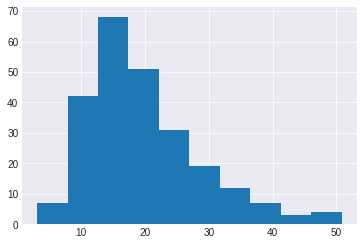

In [12]:
plt.hist(df['total_bill'])

#### Ans = Left Skewed

### Q8 - What is the average number of bills per day (to 1DP)?

In [13]:
df.day.value_counts().mean()

61.0

### Q9 - How many days had more than 60 bills?

In [14]:
df.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

### Ans = 3

### Q10 - What is the average percentage tip for male servers (enter answer as a decimal to 2DP)?

In [15]:
df.tip[df.sex=="Male"].mean()

3.0896178343949052

### Q11 - Which group size gives the smallest percentage tip on average?

In [16]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
df["percentage_tip"]= (df.tip / df.total_bill) *100
df.groupby('size')['percentage_tip'].mean().sort_values()


size
5    14.149549
4    14.594901
3    15.215685
6    15.622920
2    16.571919
1    21.729202
Name: percentage_tip, dtype: float64

### Q12 - What is the max percentage tip for female servers over the weekend (Sat or Sut) (enter answer as a decimal to 2DP)?

In [18]:
df.groupby('sex').get_group('Female').groupby('day')["percentage_tip"].max().sort_values()

day
Thur    21.150934
Fri     26.348039
Sat     32.573290
Sun     41.666667
Name: percentage_tip, dtype: float64

### Q13 - Picking a bill at random, what is the probability that the server is female (enter answer as a decimal to 2DP)?

In [19]:
df.groupby('sex').get_group('Female').count() / df.sex.count()

total_bill        0.356557
tip               0.356557
sex               0.356557
smoker            0.356557
day               0.356557
time              0.356557
size              0.356557
percentage_tip    0.356557
dtype: float64

### Q14 - Picking a bill at random, what is the probability that the server is female given that the day was Sunday (enter answer as a decimal to 2DP)?

In [20]:
df[["sex","day"]][df.day=="Sun"].groupby('sex').get_group('Female').count() / df[["sex","day"]][df.day=="Sun"].groupby('sex').get_group('Male').count()

sex    0.310345
day    0.310345
dtype: float64

### Q15 -Which meal time has the greater mean tips?

In [21]:
df.groupby('time')["tip"].mean()

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

### Q16 - True or False: "Despite female servers having higher average percentage tips, it is male servers who earn the largest percentage tips"

In [22]:
df.groupby('sex')['percentage_tip'].value_counts()


sex     percentage_tip
Male    14.482259         2
        3.563814          1
        6.565988          1
        6.653360          1
        7.180385          1
                         ..
Female  25.931446         1
        26.348039         1
        27.952481         1
        32.573290         1
        41.666667         1
Name: percentage_tip, Length: 241, dtype: int64

In [23]:
df.groupby('sex')['percentage_tip'].count()

sex
Male      157
Female     87
Name: percentage_tip, dtype: int64

### Q17 - Which day is the busiest (in terms of number of meals served)?

In [24]:
df.groupby('day')["total_bill"].count()

day
Thur    62
Fri     19
Sat     87
Sun     76
Name: total_bill, dtype: int64